In [36]:
import requests
import pandas as pd

# Function to fetch repository data from GitHub based on a topic
def fetch_github_repos(topic, per_page=30):
    url = f"https://api.github.com/search/repositories?q={topic}&sort=stars&order=desc&per_page={per_page}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        repos = data['items']
        return repos
    else:
        print(f"Failed to fetch data for topic: {topic}")
        return []

In [37]:
# Defining the topics
topics = ['machine-learning', 'data-visualization', 'deep-learning', 'nlp', 'AI', 'big-data']

# Fetching data for each topic and storing it in a list
repo_data = []
for topic in topics:
    repo_data.extend(fetch_github_repos(topic))

# Creating a DataFrame from the fetched data
df = pd.DataFrame(repo_data)

# Selecting relevant columns
df = df[['name', 'owner', 'description', 'html_url', 'language', 'created_at', 'updated_at', 'stargazers_count', 'forks_count', 'open_issues_count', 'license']]


In [38]:
df

,name,owner,description,html_url,language,created_at,updated_at,stargazers_count,forks_count,open_issues_count,license
0,tensorflow,"{'login': 'tensorflow', 'id': 15658638, 'node_...",An Open Source Machine Learning Framework for ...,https://github.com/tensorflow/tensorflow,C++,2015-11-07T01:19:20Z,2024-10-08T11:51:32Z,185875,74234,5112,"{'key': 'apache-2.0', 'name': 'Apache License ..."
1,transformers,"{'login': 'huggingface', 'id': 25720743, 'node...",🤗 Transformers: State-of-the-art Machine Learn...,https://github.com/huggingface/transformers,Python,2018-10-29T13:56:00Z,2024-10-08T11:46:15Z,133060,26554,1451,"{'key': 'apache-2.0', 'name': 'Apache License ..."
2,pytorch,"{'login': 'pytorch', 'id': 21003710, 'node_id'...",Tensors and Dynamic neural networks in Python ...,https://github.com/pytorch/pytorch,Python,2016-08-13T05:26:41Z,2024-10-08T11:46:19Z,82752,22296,15046,"{'key': 'other', 'name': 'Other', 'spdx_id': '..."
3,netdata,"{'login': 'netdata', 'id': 43390781, 'node_id'...",Architected for speed. Automated for easy. Mon...,https://github.com/netdata/netdata,C,2013-06-17T18:39:10Z,2024-10-08T11:31:47Z,71348,5890,213,"{'key': 'gpl-3.0', 'name': 'GNU General Public..."
4,ML-For-Beginners,"{'login': 'microsoft', 'id': 6154722, 'node_id...","12 weeks, 26 lessons, 52 quizzes, classic Mach...",https://github.com/microsoft/ML-For-Beginners,HTML,2021-03-03T01:34:05Z,2024-10-08T10:28:21Z,69346,14349,9,"{'key': 'mit', 'name': 'MIT License', 'spdx_id..."
...,...,...,...,...,...,...,...,...,...,...,...
175,risingwave,"{'login': 'risingwavelabs', 'id': 77175557, 'n...","Best-in-class stream processing, analytics, an...",https://github.com/risingwavelabs/risingwave,Rust,2022-01-28T12:58:03Z,2024-10-08T11:19:52Z,6883,570,1087,"{'key': 'apache-2.0', 'name': 'Apache License ..."
176,h2o-3,"{'login': 'h2oai', 'id': 1402695, 'node_id': '...","H2O is an Open Source, Distributed, Fast & Sca...",https://github.com/h2oai/h2o-3,Jupyter Notebook,2014-03-03T16:08:07Z,2024-10-07T03:29:25Z,6881,1992,2843,"{'key': 'apache-2.0', 'name': 'Apache License ..."
177,zeppelin,"{'login': 'apache', 'id': 47359, 'node_id': 'M...","Web-based notebook that enables data-driven, i...",https://github.com/apache/zeppelin,Java,2015-03-25T07:00:06Z,2024-10-07T14:18:37Z,6388,2808,174,"{'key': 'apache-2.0', 'name': 'Apache License ..."
178,arkime,"{'login': 'arkime', 'id': 71138764, 'node_id':...","Arkime is an open source, large scale, full pa...",https://github.com/arkime/arkime,JavaScript,2012-07-06T16:10:55Z,2024-10-08T08:51:42Z,6295,1040,60,"{'key': 'apache-2.0', 'name': 'Apache License ..."


In [39]:
# Cleaning up the data
df['owner'] = df['owner'].apply(lambda x: x['login'])
df['license'] = df['license'].apply(lambda x: x['name'] if x else 'No license')
df = df.rename(columns={
    'name': 'Repository_Name',
    'owner': 'Owner',
    'description': 'Description',
    'html_url': 'URL',
    'language': 'Programming_Language',
    'created_at': 'Creation_Date',
    'updated_at': 'Last_Updated_Date',
    'stargazers_count': 'Number_of_Stars',
    'forks_count': 'Number_of_Forks',
    'open_issues_count': 'Number_of_Open_Issues',
    'license': 'License_Type'
})

df['Creation_Date'] = pd.to_datetime(df['Creation_Date'])
df['Last_Updated_Date'] = pd.to_datetime(df['Last_Updated_Date'])

# Saving the cleaned data to a CSV
df.to_csv('github_repos.csv', index=False)

In [40]:
df

,Repository_Name,Owner,Description,URL,Programming_Language,Creation_Date,Last_Updated_Date,Number_of_Stars,Number_of_Forks,Number_of_Open_Issues,License_Type
0,tensorflow,tensorflow,An Open Source Machine Learning Framework for ...,https://github.com/tensorflow/tensorflow,C++,2015-11-07 01:19:20+00:00,2024-10-08 11:51:32+00:00,185875,74234,5112,Apache License 2.0
1,transformers,huggingface,🤗 Transformers: State-of-the-art Machine Learn...,https://github.com/huggingface/transformers,Python,2018-10-29 13:56:00+00:00,2024-10-08 11:46:15+00:00,133060,26554,1451,Apache License 2.0
2,pytorch,pytorch,Tensors and Dynamic neural networks in Python ...,https://github.com/pytorch/pytorch,Python,2016-08-13 05:26:41+00:00,2024-10-08 11:46:19+00:00,82752,22296,15046,Other
3,netdata,netdata,Architected for speed. Automated for easy. Mon...,https://github.com/netdata/netdata,C,2013-06-17 18:39:10+00:00,2024-10-08 11:31:47+00:00,71348,5890,213,GNU General Public License v3.0
4,ML-For-Beginners,microsoft,"12 weeks, 26 lessons, 52 quizzes, classic Mach...",https://github.com/microsoft/ML-For-Beginners,HTML,2021-03-03 01:34:05+00:00,2024-10-08 10:28:21+00:00,69346,14349,9,MIT License
...,...,...,...,...,...,...,...,...,...,...,...
175,risingwave,risingwavelabs,"Best-in-class stream processing, analytics, an...",https://github.com/risingwavelabs/risingwave,Rust,2022-01-28 12:58:03+00:00,2024-10-08 11:19:52+00:00,6883,570,1087,Apache License 2.0
176,h2o-3,h2oai,"H2O is an Open Source, Distributed, Fast & Sca...",https://github.com/h2oai/h2o-3,Jupyter Notebook,2014-03-03 16:08:07+00:00,2024-10-07 03:29:25+00:00,6881,1992,2843,Apache License 2.0
177,zeppelin,apache,"Web-based notebook that enables data-driven, i...",https://github.com/apache/zeppelin,Java,2015-03-25 07:00:06+00:00,2024-10-07 14:18:37+00:00,6388,2808,174,Apache License 2.0
178,arkime,arkime,"Arkime is an open source, large scale, full pa...",https://github.com/arkime/arkime,JavaScript,2012-07-06 16:10:55+00:00,2024-10-08 08:51:42+00:00,6295,1040,60,Apache License 2.0


In [41]:
df.isnull().sum()

Repository_Name           0
Owner                     0
Description               0
URL                       0
Programming_Language     21
Creation_Date             0
Last_Updated_Date         0
Number_of_Stars           0
Number_of_Forks           0
Number_of_Open_Issues     0
License_Type              0
dtype: int64

In [44]:
# Importing necessary libraries
import pandas as pd

# Filling the missing values in 'Programming_Language' with the mode
mode_value = df['Programming_Language'].mode()[0]
df['Programming_Language'].fillna(mode_value, inplace=True)

# Checking if there are any remaining missing values
print(df.isnull().sum())


Repository_Name          0
Owner                    0
Description              0
URL                      0
Programming_Language     0
Creation_Date            0
Last_Updated_Date        0
Number_of_Stars          0
Number_of_Forks          0
Number_of_Open_Issues    0
License_Type             0
dtype: int64


In [46]:
import sqlite3

# Creating a connection to the SQLite database
conn = sqlite3.connect('github_repos.db')

# Saving the DataFrame to the database
df.to_sql('repositories', conn, if_exists='replace', index=False)

# Closing the connection
conn.close()


C:\Users\DELL\AppData\Local\Temp\ipykernel_18388\1529877171.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




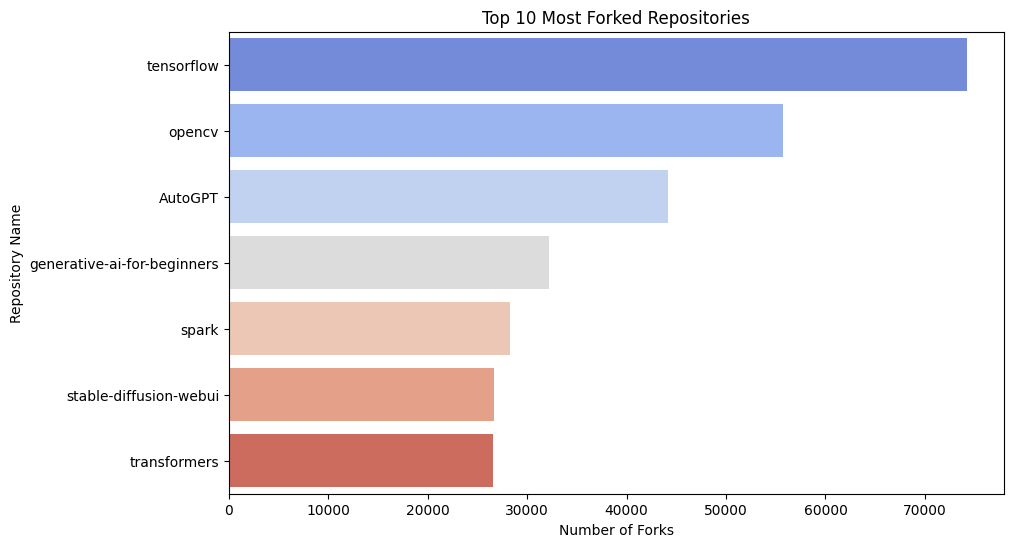

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
# Top 10 most forked repositories
top_forked = df[['Repository_Name', 'Number_of_Forks']].sort_values(by='Number_of_Forks', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Number_of_Forks', y='Repository_Name', data=top_forked, palette='coolwarm')
plt.title("Top 10 Most Forked Repositories")
plt.xlabel("Number of Forks")
plt.ylabel("Repository Name")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_18388\3181384806.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




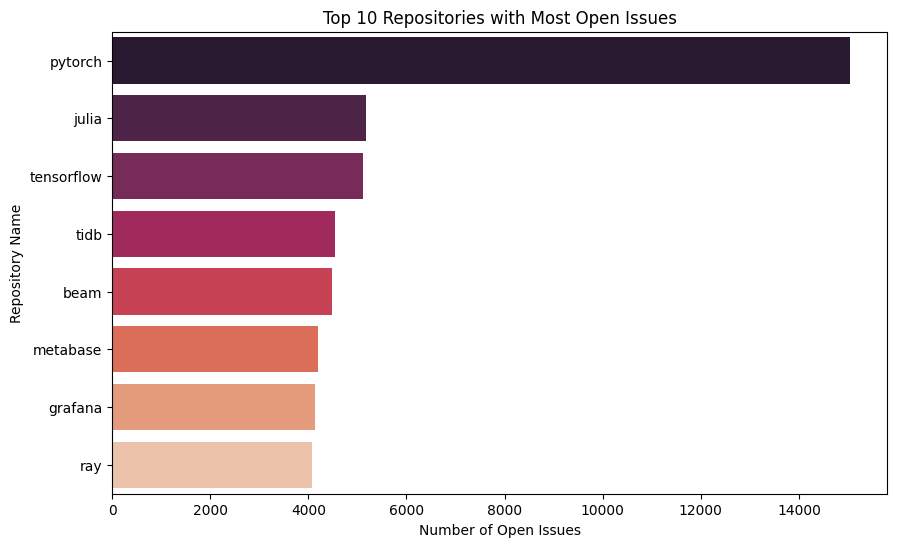

In [48]:
# Top 10 repositories with most open issues
top_issues = df[['Repository_Name', 'Number_of_Open_Issues']].sort_values(by='Number_of_Open_Issues', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Number_of_Open_Issues', y='Repository_Name', data=top_issues, palette='rocket')
plt.title("Top 10 Repositories with Most Open Issues")
plt.xlabel("Number of Open Issues")
plt.ylabel("Repository Name")
plt.show()


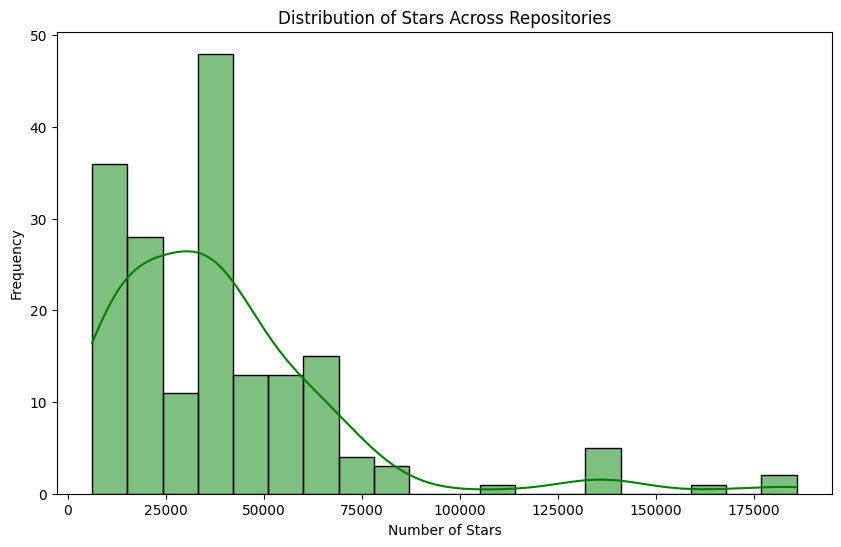

In [49]:
# Distribution of stars across repositories
plt.figure(figsize=(10, 6))
sns.histplot(df['Number_of_Stars'], bins=20, kde=True, color='green')
plt.title("Distribution of Stars Across Repositories")
plt.xlabel("Number of Stars")
plt.ylabel("Frequency")
plt.show()


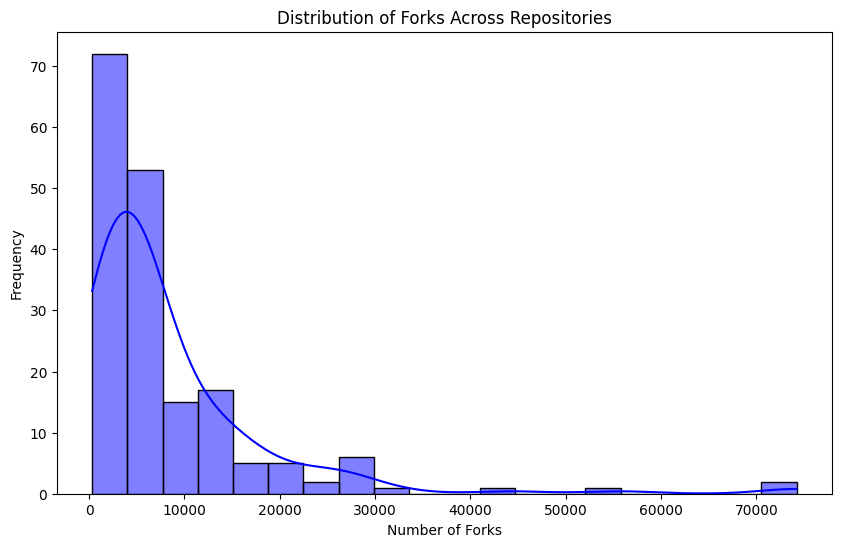

In [50]:
# Distribution of forks across repositories
plt.figure(figsize=(10, 6))
sns.histplot(df['Number_of_Forks'], bins=20, kde=True, color='blue')
plt.title("Distribution of Forks Across Repositories")
plt.xlabel("Number of Forks")
plt.ylabel("Frequency")
plt.show()


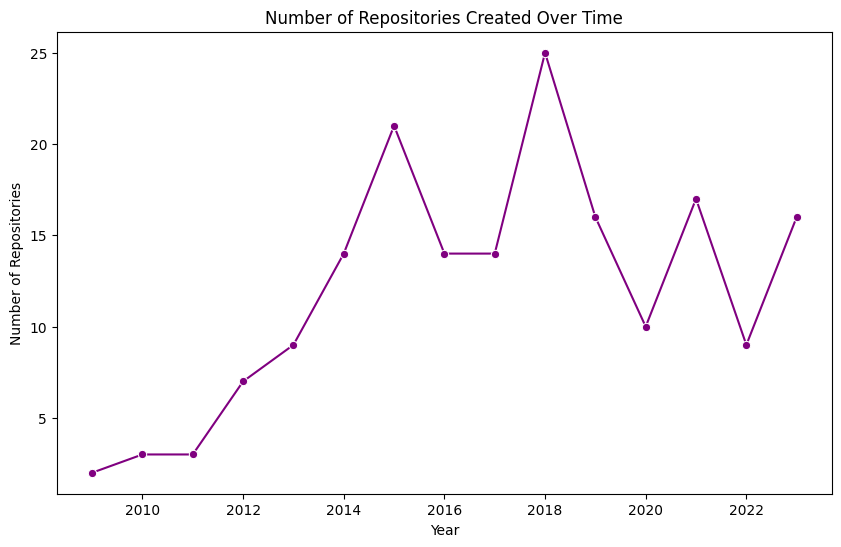

In [51]:
# Repositories creation over time
df['Creation_Year'] = df['Creation_Date'].dt.year
repos_by_year = df['Creation_Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=repos_by_year.index, y=repos_by_year.values, marker='o', color='purple')
plt.title("Number of Repositories Created Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Repositories")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_18388\4048678165.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




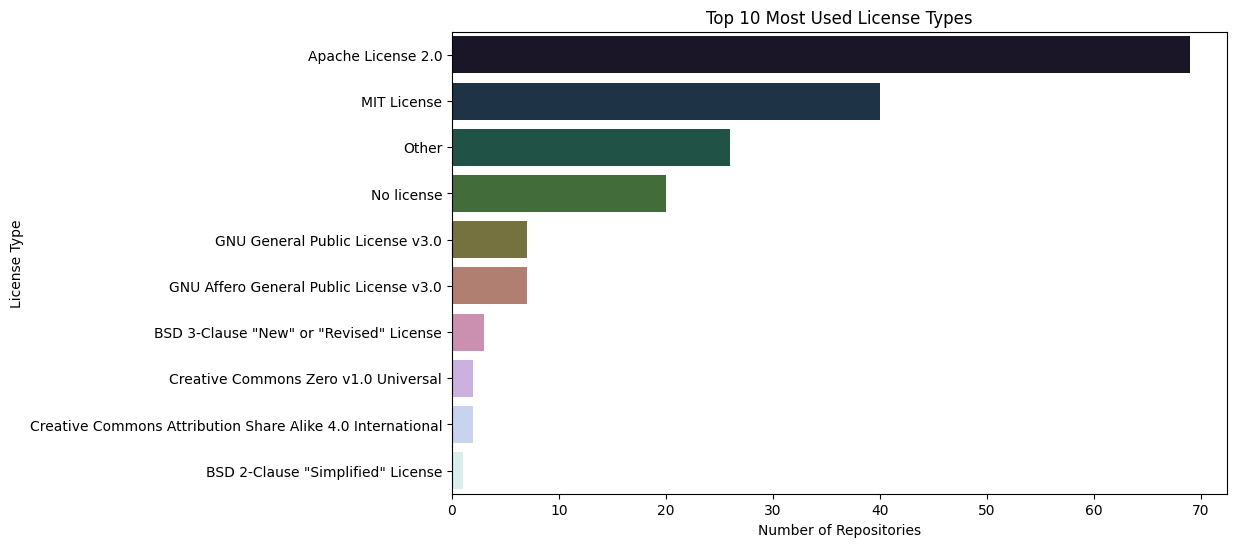

In [52]:
# Top 10 most used license types
top_licenses = df['License_Type'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_licenses.values, y=top_licenses.index, palette='cubehelix')
plt.title("Top 10 Most Used License Types")
plt.xlabel("Number of Repositories")
plt.ylabel("License Type")
plt.show()


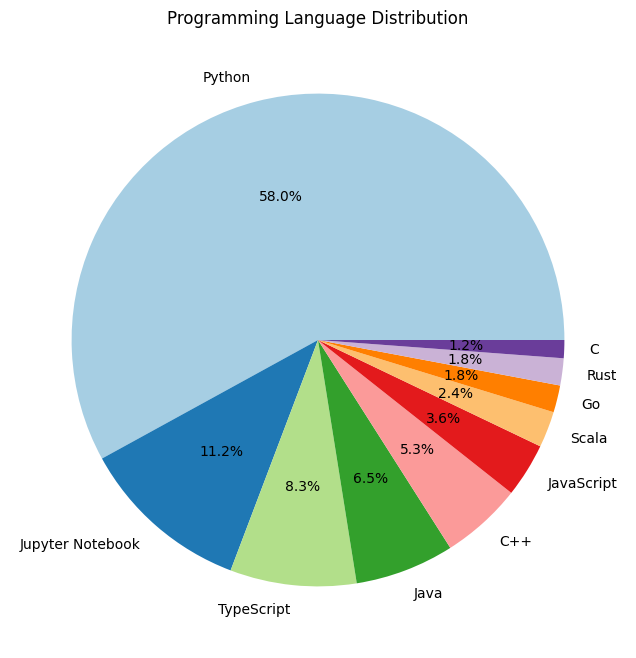

In [53]:
# Pie chart for programming language distribution
plt.figure(figsize=(8, 8))
top_languages = df['Programming_Language'].value_counts().head(10)
plt.pie(top_languages, labels=top_languages.index, autopct='%1.1f%%', colors=sns.color_palette('Paired', 10))
plt.title("Programming Language Distribution")
plt.show()


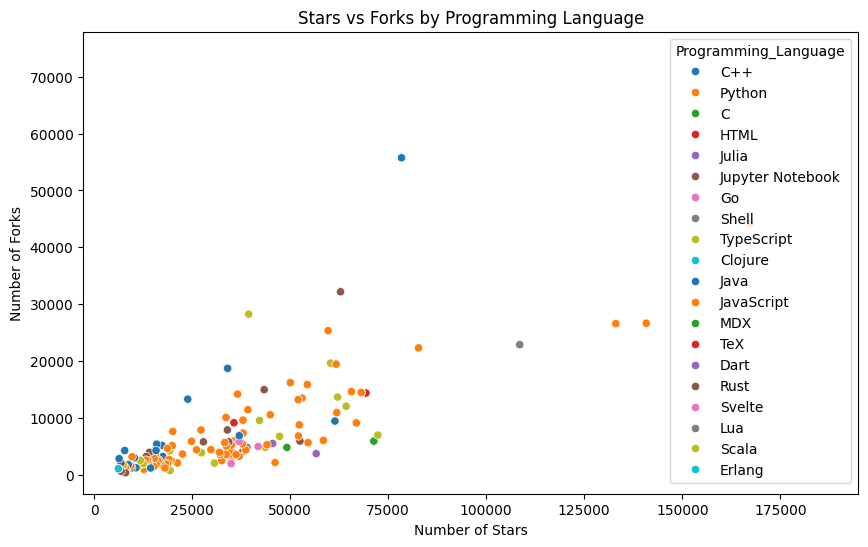

In [54]:
# Scatter plot for Stars vs Forks
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_Stars', y='Number_of_Forks', data=df, hue='Programming_Language', palette='tab10')
plt.title("Stars vs Forks by Programming Language")
plt.xlabel("Number of Stars")
plt.ylabel("Number of Forks")
plt.show()


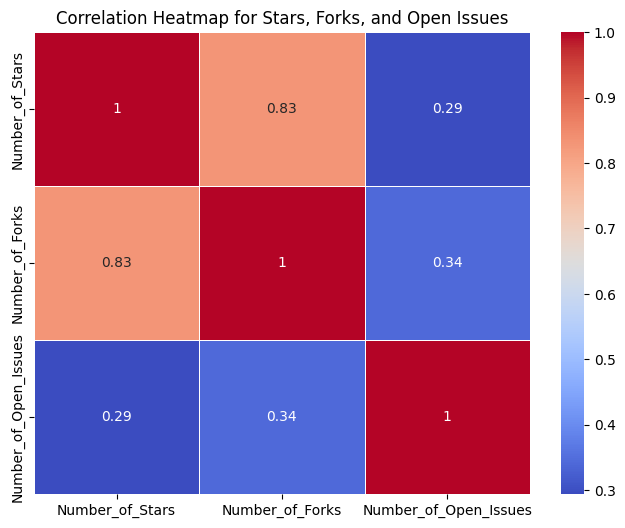

In [56]:
# Heatmap for correlation between stars, forks, and issues
plt.figure(figsize=(8, 6))
corr = df[['Number_of_Stars', 'Number_of_Forks', 'Number_of_Open_Issues']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for Stars, Forks, and Open Issues")
plt.show()
